## Package

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [8]:
data = pd.read_csv('/home/bibekg/Learning/AQI_COL/Air-Quality-Prediction/airprediction/Data/Real-Data/Real_Combine.csv')

# Reading first 5 rows
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,AQI
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

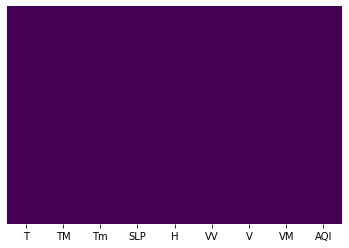

In [9]:
data.isnull().sum()

# if we have minimum null values we can drop null values
data = data.dropna()
# We don`t have null values

# Plotting the Null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Dividing the features

In [10]:
X = data.drop(['PM 2.5'], axis=1) # Droping the Target Variable i.e. PM 2.5
Y = pd.DataFrame(data['PM 2.5']) # Assigning the Target Vatiavle to Y

KeyError: "['PM 2.5'] not found in axis"

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [ ]:
from sklearn.ensemble  import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor()
model.fit(X,Y)

In [ ]:
# This is used when we have many features and we have to select top 10 featues from the DataSet
fea_impotance = pd.DataFrame({
                                 'Features': X.columns,
                                 'Feature_Imp' : model.feature_importances_
                                 })
fea_impotance

In [ ]:
# Plotting the Graph of FEATURE IMPORTANCE for better visualisation
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

### Train Test Data Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=0)

In [ ]:
### Plotting Target Variable

In [ ]:
sns.distplot(Y)

## Implementing XGBoost Regression

In [ ]:
# Installing XGBOOST
# conda install -c anaconda py-xgboost

import xgboost as xbg

In [ ]:
xgb_regressor = xbg.XGBRegressor()
xgb_regressor.fit(X_train,Y_train)

In [ ]:
# Calcu;ating R^2 for Training dataset
xgb_train_score = xgb_regressor.score(X_train, Y_train)
print(f'Coefficient of determination R^2 on training Dataset : {xgb_train_score}')

In [ ]:
# Calcu;ating R^2 for Testing dataset
xgb_test_score = xgb_regressor.score(X_test, Y_test)
print(f'Coefficient of determination R^2 on training Dataset : {xgb_test_score}')

In [ ]:
# Performing cross validation
from sklearn.model_selection import cross_val_score
xgb_cross_val_score = cross_val_score(xgb_regressor, X,Y, cv=5)

In [ ]:
xgb_cross_val_score.mean()

## Model Evaluation

In [ ]:
prediction = xgb_regressor.predict(X_test)

In [ ]:
plt.scatter(Y_test, prediction)

## Hyperparameter Tuning

In [ ]:
xgb.XGBRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]



In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb_hyper_regressor= xbg.XGBRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = xgb_hyper_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
xg_random.fit(X_train,Y_train)

In [ ]:
xg_random.best_params_

In [ ]:
xg_random.best_score_

In [ ]:
predictions=xg_random.predict(X_test)

In [ ]:
plt.scatter(Y_test,predictions)

In [ ]:
from sklearn import metrics
# For XGBOOST
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

In [ ]:
import pickle 

In [ ]:
# open a file, where you ant to store the data
file = open('regression_xgboost.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)

In [ ]:
pd.show_versions()

In [ ]:
import pandas as pd
data = pd.read_csv('/home/bibekg/Learning/AQI_COL/Air-Quality-Prediction/airprediction/main/data.csv')
data
